# **df5 - Model Training**

# **Description: Used for clustering customers into risk profiles.**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/df5_scaled.csv')

In [3]:
df.head()

Unnamed: 0                           Customer_ID  Age    Income  \
0           0  bdd640fb-0667-4ad1-9c80-317fa3b1799d   58 -1.347477   
1           1  bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9   61  0.835905   
2           2  815ef6d1-3b8f-4a18-b7f8-a88b17fc695a   19 -1.408661   
3           3  96da1dac-72ff-4d2a-b86e-cbe06b65a6a4   63  0.520947   
4           4  b2b9437a-28df-4ec4-8e4a-2bbdc241330b   69  1.282176   

         Location  Number_of_Active_Policies  Total_Premium_Paid  \
0        Johnberg                          3           -0.861332   
1  New Roberttown                          5           -1.408809   
2   New Jamesside                          2            0.041455   
3        Lisatown                          5           -0.256058   
4    Petersonberg                          2            0.709659   

   Claim_Frequency  Policy_Upgrades  
0                2                0  
1                6                0  
2                0                1  
3                7                2  
4                5                2

In [4]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Location', 'Number_of_Active_Policies',
       'Total_Premium_Paid', 'Claim_Frequency', 'Policy_Upgrades'],
      dtype='object')

In [6]:
df.drop('Customer_ID', axis=1, inplace=True)

In [7]:
df['Location'].value_counts()

Location
East Robert     3
Matthewfurt     3
South Andrea    3
Lake Jessica    3
Lake Peter      3
               ..
Jessicafurt     1
Marciaville     1
Lauramouth      1
East Carrie     1
Youngshire      1
Name: count, Length: 963, dtype: int64

In [8]:
df.drop('Location',axis=1, inplace=True)

In [9]:
df.columns

Index(['Age', 'Income', 'Number_of_Active_Policies', 'Total_Premium_Paid',
       'Claim_Frequency', 'Policy_Upgrades'],
      dtype='object')

In [10]:
############################################################################

# **1) k-Means Clustering**

In [11]:
!pip install kneed

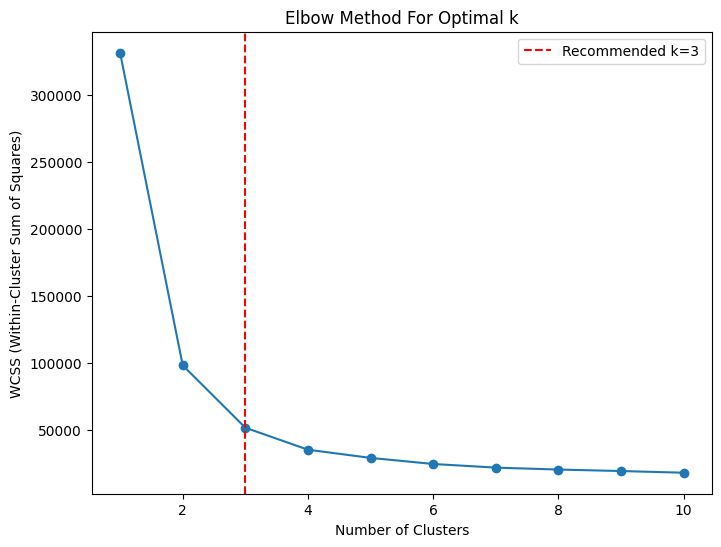

Recommended number of clusters: 3


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


# Step 1: Find the optimal number of clusters using the Elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Determine the optimal number of clusters using the KneeLocator
knee_locator = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
recommended_k = knee_locator.elbow

# Plot the Elbow chart
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.axvline(x=recommended_k, color='r', linestyle='--', label=f'Recommended k={recommended_k}')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.legend()
plt.show()

print(f'Recommended number of clusters: {recommended_k}')


In [ ]:
df.head()

Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
0   58 -1.347477                          3           -0.861332   
1   61  0.835905                          5           -1.408809   
2   19 -1.408661                          2            0.041455   
3   63  0.520947                          5           -0.256058   
4   69  1.282176                          2            0.709659   

   Claim_Frequency  Policy_Upgrades  
0                2                0  
1                6                0  
2                0                1  
3                7                2  
4                5                2

# **Silhouette Score for k=3: 0.50**

Silhouette Score for k=3: 0.50

Number of data points in each cluster:
Cluster
0    356
1    347
2    297
Name: count, dtype: int64


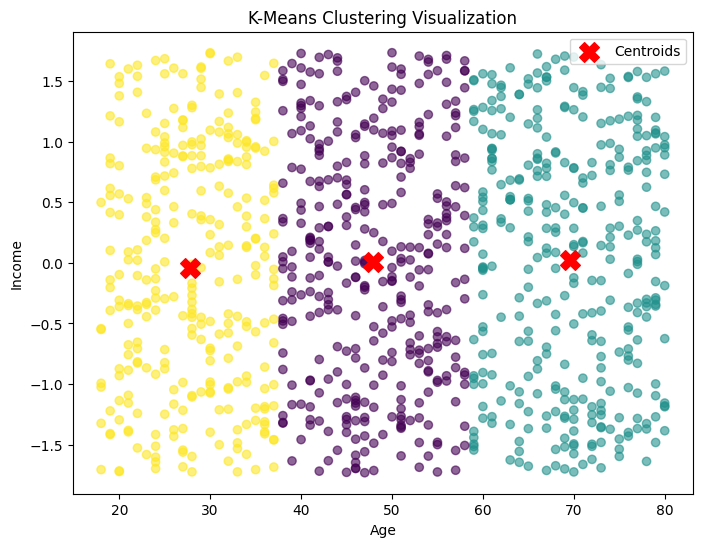

   Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
0   58 -1.347477                          3           -0.861332   
1   61  0.835905                          5           -1.408809   
2   19 -1.408661                          2            0.041455   
3   63  0.520947                          5           -0.256058   
4   69  1.282176                          2            0.709659   

   Claim_Frequency  Policy_Upgrades  Cluster  
0                2                0        0  
1                6                0        1  
2                0                1        2  
3                7                2        1  
4                5                2        1  


In [18]:

# Step 2: Apply KMeans with the recommended number of clusters
kmeans = KMeans(n_clusters=recommended_k, random_state=42)
clusters = kmeans.fit_predict(df)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# Step 3: Calculate Silhouette Score
silhouette_avg = silhouette_score(df, clusters)
print(f'Silhouette Score for k={recommended_k}: {silhouette_avg:.2f}')

# Show cluster counts
cluster_counts = df['Cluster'].value_counts()
print("\nNumber of data points in each cluster:")
print(cluster_counts)

# Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Visualization')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()

# Save clustered data to CSV
df.to_csv("customer_segmented_data_kmeans.csv", index=False)

print(df.head())

# **Silhouette Score for k=3: 0.50**

In [ ]:
#########################################################################################

# **2) Hierarchical [ agglomerative clustering ]**

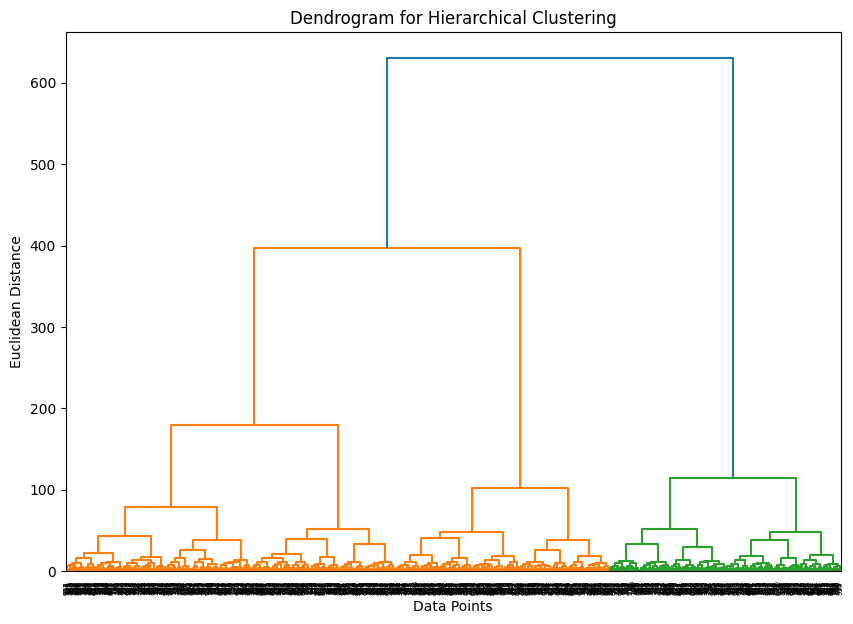

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent

# Load your pre-scaled dataset

# Hierarchical Agglomerative Clustering with Dendrogram
linked = linkage(df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Recommended number of clusters based on dendrogram: 4
Based on the dendrogram, enter the suggested number of clusters: 4
Silhouette Score for 4 clusters: 0.42

Number of data points in each cluster:
   Cluster  Count
0        1    299
1        2    276
2        4    239
3        3    186


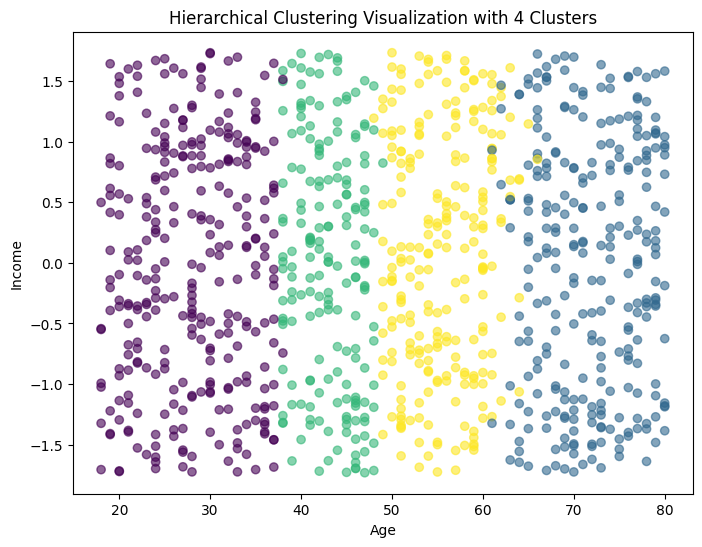

   Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
0   58 -1.347477                          3           -0.861332   
1   61  0.835905                          5           -1.408809   
2   19 -1.408661                          2            0.041455   
3   63  0.520947                          5           -0.256058   
4   69  1.282176                          2            0.709659   

   Claim_Frequency  Policy_Upgrades  Cluster  Hierarchical_Cluster  
0                2                0        0                     4  
1                6                0        1                     4  
2                0                1        2                     1  
3                7                2        1                     2  
4                5                2        1                     2  


In [ ]:
# Get the inconsistency coefficients to find large jumps in distances
incons = inconsistent(linked)

# Example: Recommend a cluster count where the jump is the most significant
# (you can tweak the threshold based on how clear the dendrogram is)
recommended_k = 4  # This is just an example — you choose the value visually
print(f"Recommended number of clusters based on dendrogram: {recommended_k}")

# Suggest the optimal number of clusters by visually inspecting the dendrogram
optimal_clusters = int(input("Based on the dendrogram, enter the suggested number of clusters: "))

# Apply hierarchical clustering with the chosen number of clusters
hierarchical_clusters = fcluster(linked, optimal_clusters, criterion='maxclust')
df['Hierarchical_Cluster'] = hierarchical_clusters

# Calculate Silhouette Score
silhouette_avg = silhouette_score(df.drop(columns=['Hierarchical_Cluster']), hierarchical_clusters)
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.2f}')

# Show cluster counts
cluster_counts = df['Hierarchical_Cluster'].value_counts()
print("\nNumber of data points in each cluster:")
print(cluster_counts.rename_axis('Cluster').reset_index(name='Count'))

# Visualize the clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=hierarchical_clusters, cmap='viridis', alpha=0.6)
plt.title(f'Hierarchical Clustering Visualization with {optimal_clusters} Clusters')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

# Save clustered data to CSV
df.to_csv("customer_segmented_data_hierarchical.csv", index=False)

print(df.head())


In [ ]:
###########################################################################################

# **3) DBScan Algorithm**

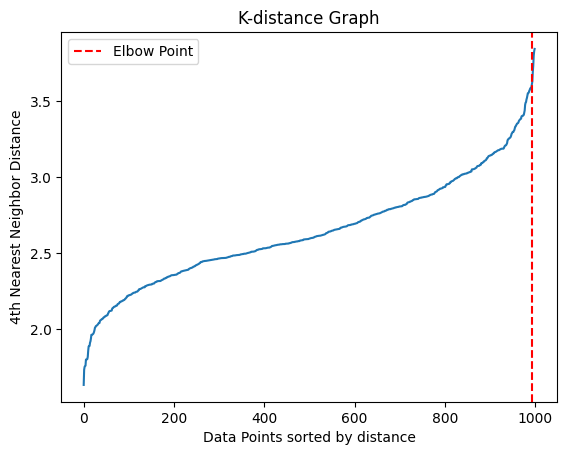

Recommended eps: 3.61
Recommended min_samples: 16


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


# K-distance Graph to find optimal eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Sort and plot the 4th nearest neighbor distance
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')

# Mark the elbow point on the graph
elbow_point = np.argmax(np.diff(distances, 2))  # Second derivative to find the sharpest turn
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Elbow Point')
plt.legend()
plt.show()

# Example recommended parameters based on elbow point
recommended_eps = distances[elbow_point]
recommended_min_samples = 2 * df.shape[1]
print(f"Recommended eps: {recommended_eps:.2f}")
print(f"Recommended min_samples: {recommended_min_samples}")


Enter the recommended eps value based on the elbow point: 3.61
Enter the recommended min_samples value: 16
Silhouette Score: 0.49

Number of data points in each cluster:
DBSCAN_Cluster
 0    693
 1    295
-1     12
Name: count, dtype: int64


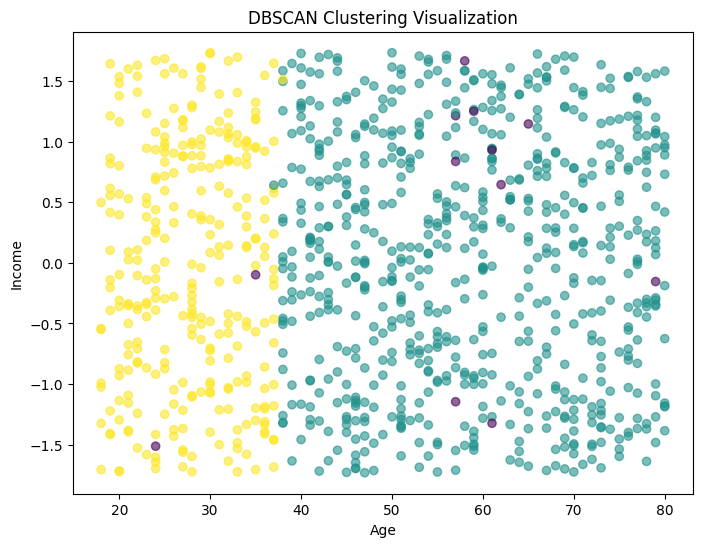

   Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
0   58 -1.347477                          3           -0.861332   
1   61  0.835905                          5           -1.408809   
2   19 -1.408661                          2            0.041455   
3   63  0.520947                          5           -0.256058   
4   69  1.282176                          2            0.709659   

   Claim_Frequency  Policy_Upgrades  Cluster  Hierarchical_Cluster  \
0                2                0        0                     4   
1                6                0        1                     4   
2                0                1        2                     1   
3                7                2        1                     2   
4                5                2        1                     2   

   DBSCAN_Cluster  
0               0  
1               0  
2               1  
3               0  
4               0  


In [ ]:
# Enter recommended eps and min_samples based on the graph
eps_value = float(input("Enter the recommended eps value based on the elbow point: "))
min_samples_value = int(input("Enter the recommended min_samples value: "))

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

# Calculate Silhouette Score (ignoring noise points)
filtered_df = df[df['DBSCAN_Cluster'] != -1]
if len(filtered_df['DBSCAN_Cluster'].unique()) > 1:  # Ensure more than 1 cluster exists
    silhouette_avg = silhouette_score(filtered_df.drop(columns=['DBSCAN_Cluster']), filtered_df['DBSCAN_Cluster'])
    print(f'Silhouette Score: {silhouette_avg:.2f}')
else:
    print("Not enough clusters to calculate silhouette score")

# Show cluster counts
cluster_counts = df['DBSCAN_Cluster'].value_counts()
print("\nNumber of data points in each cluster:")
print(cluster_counts)

# Visualize clusters (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
plt.title(f'DBSCAN Clustering Visualization')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

# Save clustered data to CSV
df.to_csv("customer_segmented_data_dbscan.csv", index=False)

print(df.head())

In [ ]:
###################################################################

# **1) K-Means Clustering**

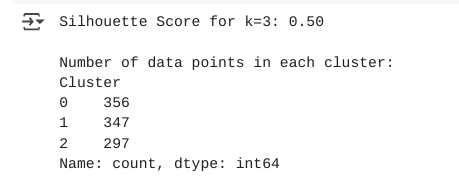

# **2) Hierarchical [ agglomerative clustering ]**

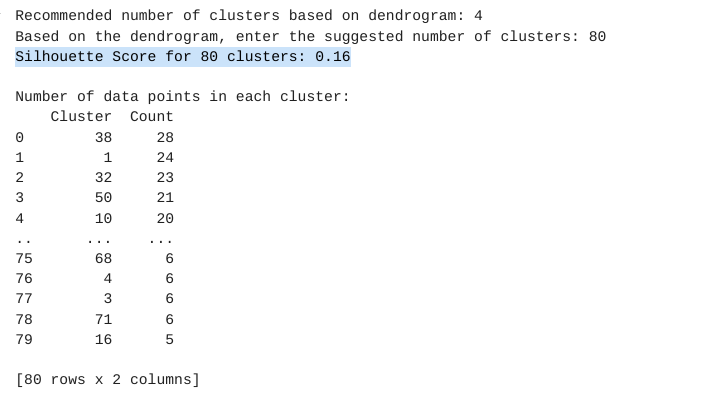

# **3) DBScan Algorithm**

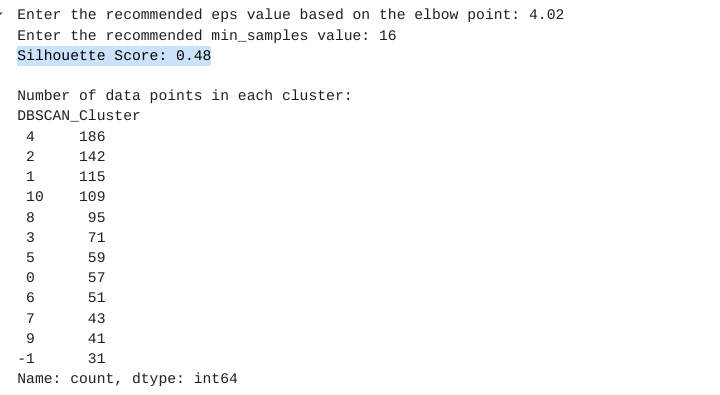



In [ ]:
#############################################################################


# 1) Silhouette Score - for **K-Means Clustering** is 0.50

# 2) Silhouette Score - for **Hierarchical Clustering** is 0.16

# 3) Silhouette Score - for **DBScan Clustering** is 0.48


In [ ]:
#########################################################################

# **Silhouette Score Near to 1 is Good - K-Means Clustering is 0.50 is Higher Compare to Other Clustering**

In [ ]:
################################################################################

# **K-Means Clustering Selected**

# **PCA - K-Means**

          Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
PC1  0.999956  0.001144                  -0.000235            0.001522   
PC2 -0.008529 -0.023155                  -0.015502           -0.007245   

     Claim_Frequency  Policy_Upgrades  
PC1         0.008554         0.003202  
PC2         0.999542         0.003785  


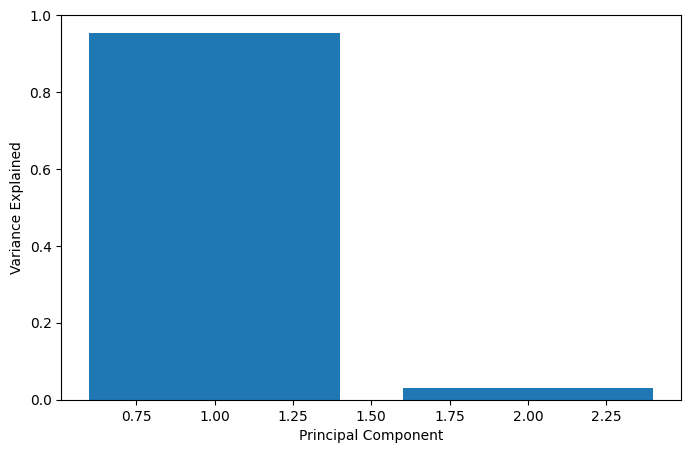

Recommended number of clusters: 3
Silhouette Score for k=3: 0.52

Number of data points in each cluster:
Cluster
0    356
1    347
2    297
Name: count, dtype: int64


         PC1       PC2  Cluster
0   8.494422 -3.134971        0
1  11.529703  0.760016        1
2 -30.516246 -4.787262        2
3  13.545968  1.749012        1
4  19.531646 -0.279362        1


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

# Sample data (replace with your actual DataFrame)
data = df[['Age', 'Income', 'Number_of_Active_Policies', 'Total_Premium_Paid',
           'Claim_Frequency', 'Policy_Upgrades']]

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_data = pca.fit_transform(data)

# Create a DataFrame to see how much each original feature contributes to PC1 and PC2
loadings = pd.DataFrame(pca.components_, columns=data.columns, index=['PC1', 'PC2'])

print(loadings)

# Visualize explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Step 1: Find the optimal number of clusters using the Elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Determine the optimal number of clusters using the KneeLocator
knee_locator = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
recommended_k = knee_locator.elbow

# Plot the Elbow chart
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.axvline(x=recommended_k, color='r', linestyle='--', label=f'Recommended k={recommended_k}')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.legend()
plt.show()

print(f'Recommended number of clusters: {recommended_k}')

# Step 2: Apply KMeans with the recommended number of clusters
kmeans = KMeans(n_clusters=recommended_k, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the PCA dataframe
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Step 3: Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_data, clusters)
print(f'Silhouette Score for k={recommended_k}: {silhouette_avg:.2f}')

# Show cluster counts
cluster_counts = pca_df['Cluster'].value_counts()
print("\nNumber of data points in each cluster:")
print(cluster_counts)

# Visualize the PCA-based clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('PCA-Based K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Save clustered PCA data to CSV
pca_df.to_csv("customer_segmented_data_pca_kmeans.csv", index=False)

print(pca_df.head())


#  **Claim_Frequency - Policy_Upgrades**

**PC1**   -      0.008554    -     0.003202  

**PC2**    -     0.999542    -    0.003785  

In [ ]:
############################################################################

# **1️⃣ Interpret the Clusters**

# **Understand the meaning of each cluster:**

Check the average values of original features for each cluster to see what defines them

In [ ]:
df.head()

Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
0   58 -1.347477                          3           -0.861332   
1   61  0.835905                          5           -1.408809   
2   19 -1.408661                          2            0.041455   
3   63  0.520947                          5           -0.256058   
4   69  1.282176                          2            0.709659   

   Claim_Frequency  Policy_Upgrades  Cluster  Hierarchical_Cluster  \
0                2                0        0                     4   
1                6                0        1                     4   
2                0                1        2                     1   
3                7                2        1                     2   
4                5                2        1                     2   

   DBSCAN_Cluster  
0               0  
1               0  
2               1  
3               0  
4               0

In [ ]:
df.drop(columns=['Hierarchical_Cluster','DBSCAN_Cluster'])

Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
0     58 -1.347477                          3           -0.861332   
1     61  0.835905                          5           -1.408809   
2     19 -1.408661                          2            0.041455   
3     63  0.520947                          5           -0.256058   
4     69  1.282176                          2            0.709659   
..   ...       ...                        ...                 ...   
995   58 -0.135682                          5            1.395212   
996   77  0.842556                          5           -0.672598   
997   53  0.125447                          2            0.291159   
998   22  1.630195                          3            1.203921   
999   58  0.119853                          2            0.268921   

     Claim_Frequency  Policy_Upgrades  Cluster  
0                  2                0        0  
1                  6                0        1  
2                  0                1        2  
3                  7                2        1  
4                  5                2        1  
..               ...              ...      ...  
995                7                3        0  
996               10                2        1  
997                5                2        0  
998                5                3        2  
999                6                1        0  

[1000 rows x 7 columns]

In [ ]:
cluster_summary.drop(columns=['Hierarchical_Cluster','DBSCAN_Cluster'],axis=1,inplace=True)

In [ ]:
cluster_summary = df.groupby('Cluster').mean()

In [ ]:
cluster_summary

Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
Cluster                                                                       
0        47.952247  0.008523                   2.960674           -0.022918   
1        69.547550  0.027331                   3.097983            0.045963   
2        27.835017 -0.042148                   3.080808           -0.026230   

         Claim_Frequency  Policy_Upgrades  Hierarchical_Cluster  \
Cluster                                                           
0               4.918539         1.525281              3.460674   
1               5.317003         1.576369              2.409222   
2               5.050505         1.461279              1.000000   

         DBSCAN_Cluster  
Cluster                  
0             -0.008427  
1             -0.017291  
2              0.983165

**Profile the clusters:** Are they high-income customers? Frequent claimers? Long-time policyholders?

**Visualize the clusters:** Use PCA components or original features for a 2D or 3D scatter plot.

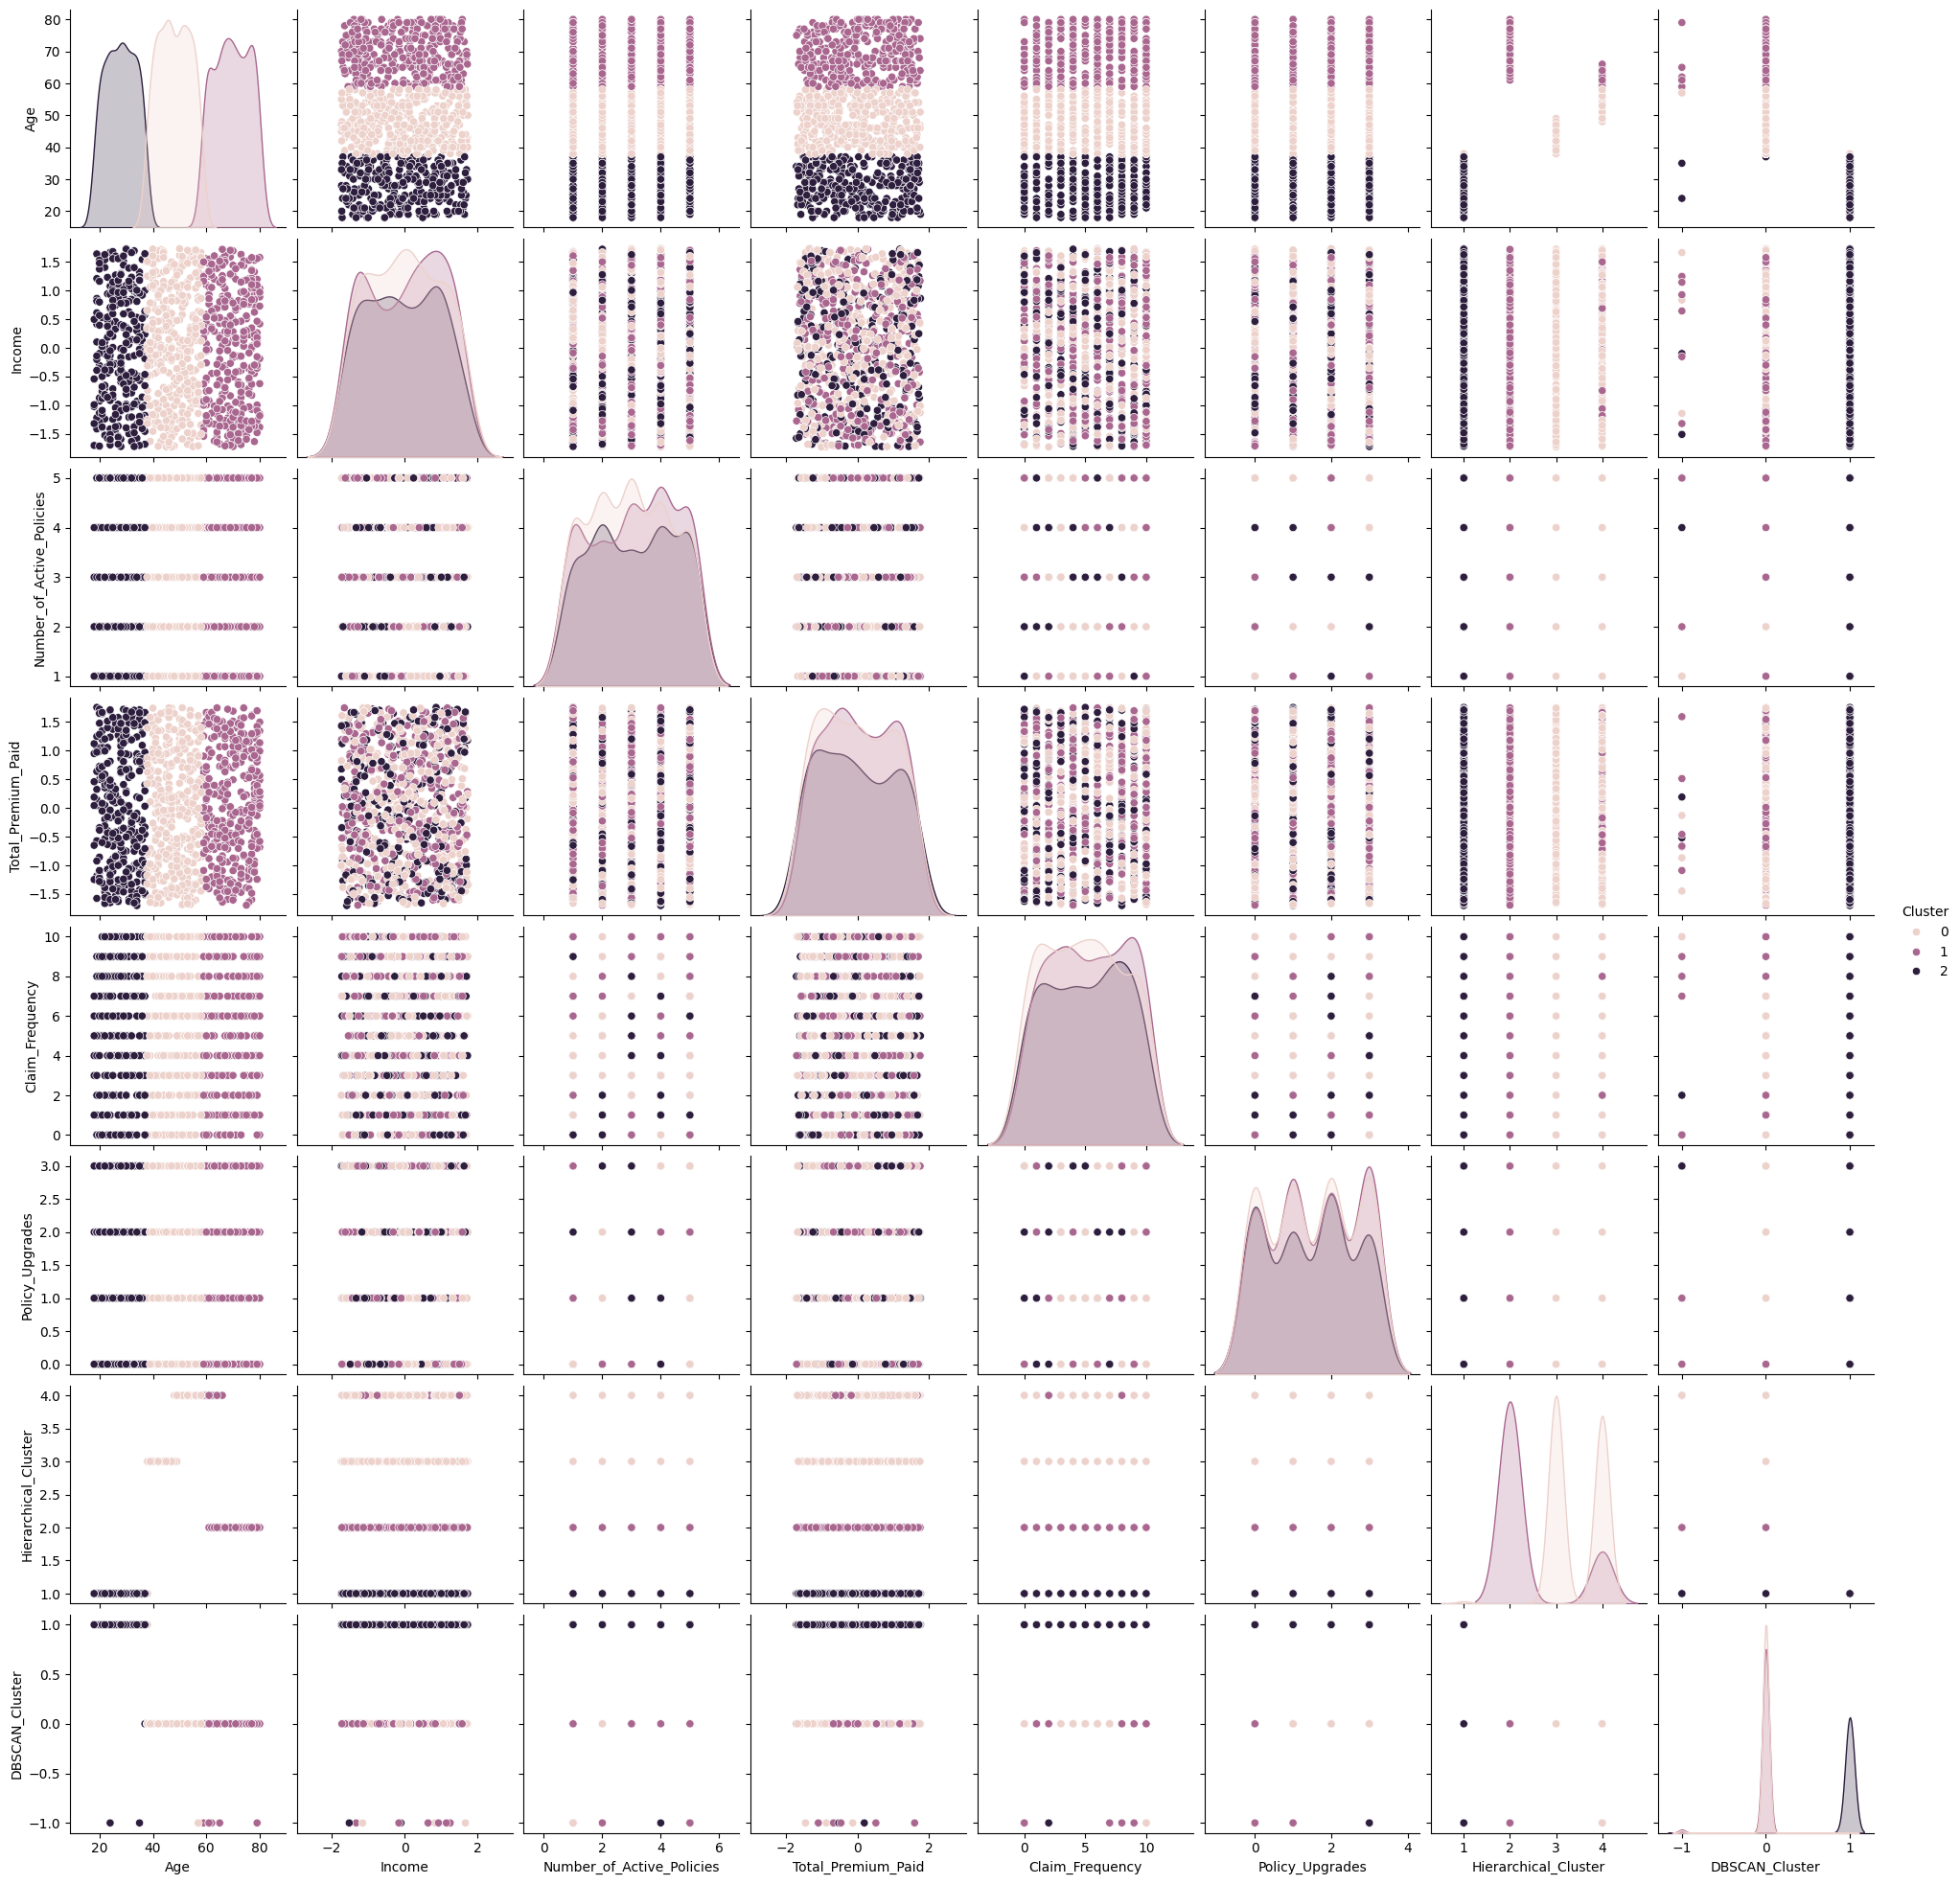

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.show()

In [ ]:
print(f'K-Means Inertia: {kmeans.inertia_}')

K-Means Inertia: 46237.590486579116


Screenshot 2025-03-15 11.46.41 AM.png

In [ ]:
##################################################################################

# **1. Get Cluster Centroids**

# **Average Feature Values for Each Cluster:**

In [ ]:
import pandas as pd

# Convert centroids to a DataFrame for better readability
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2'])

# Add cluster labels
centroid_df.index = [f'Cluster {i}' for i in range(len(centroid_df))]

print("Cluster Centroids:\n", centroid_df)

Cluster Centroids:
                  PC1       PC2
Cluster 0  -1.520206 -0.163161
Cluster 1  20.077823  0.048065
Cluster 2 -21.635728  0.139416


# **This will show how different each cluster is based on PCA components.**

In [ ]:
###############################################################################################

# **2. Compare Feature Distributions per Cluster**

**Since PCA transformed features, we need to map clusters back to original features:**

In [ ]:
# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Group by clusters and calculate feature means
cluster_summary = df.groupby('Cluster').mean()

print("Cluster-wise Feature Averages:\n", cluster_summary)


Cluster-wise Feature Averages:
                Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
Cluster                                                                       
0        47.952247  0.008523                   2.960674           -0.022918   
1        69.547550  0.027331                   3.097983            0.045963   
2        27.835017 -0.042148                   3.080808           -0.026230   

         Claim_Frequency  Policy_Upgrades  Hierarchical_Cluster  \
Cluster                                                           
0               4.918539         1.525281              3.460674   
1               5.317003         1.576369              2.409222   
2               5.050505         1.461279              1.000000   

         DBSCAN_Cluster  
Cluster                  
0             -0.008427  
1             -0.017291  
2              0.983165  


# **Cluster 1** has a Highest Income, Highest Claim Frequency, High Number of Policy Upgrades, Claim Frequency

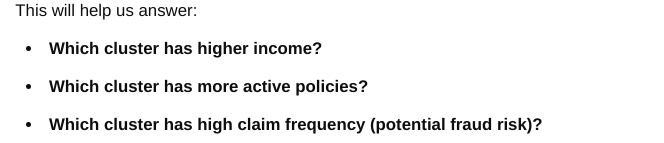

In [ ]:
#####################################################################

# **Bonus Visualization:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of a key feature (e.g., Claim_Frequency) across clusters
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Claim_Frequency'])
plt.title('Claim Frequency Across Clusters')
plt.show()

# **Large Number of Claim Frequency Happens on Cluster 2**

image.png

In [ ]:
############################################################################

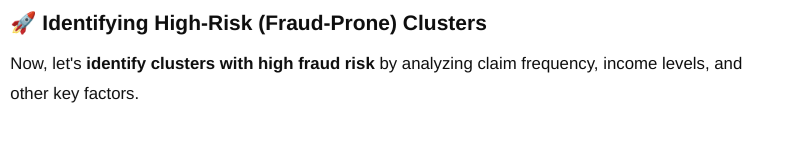

image.png

In [ ]:
# Sort clusters by claim frequency (descending)
high_risk_cluster = df.groupby('Cluster')[['Claim_Frequency', 'Income', 'Number_of_Active_Policies']].mean().sort_values(by='Claim_Frequency', ascending=False)

print("Cluster Characteristics (Sorted by Claim Frequency):\n", high_risk_cluster)

Cluster Characteristics (Sorted by Claim Frequency):
          Claim_Frequency    Income  Number_of_Active_Policies
Cluster                                                      
1               5.317003  0.027331                   3.097983
2               5.050505 -0.042148                   3.080808
0               4.918539  0.008523                   2.960674


# **High Claim Frequency and High Number of Active Policies Consider as a Cluster 1**

# **Low Income Group Consider as Class 0**

image.png

In [ ]:
################################################################################

image.png

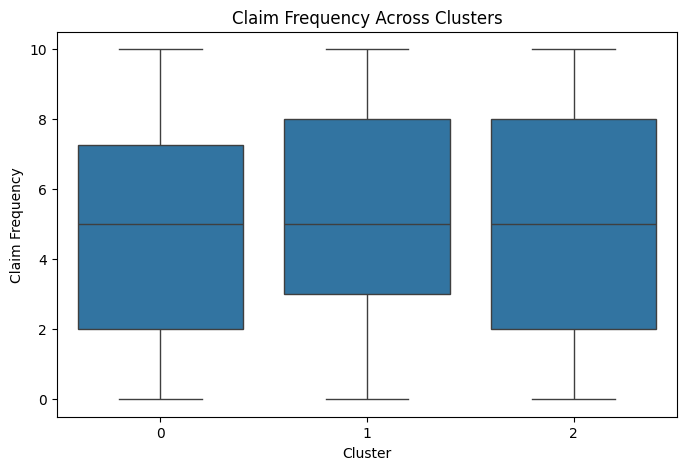

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Cluster'], y=df['Claim_Frequency'])
plt.title('Claim Frequency Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Claim Frequency')
plt.show()


# **A cluster with high median & many outliers is likely fraud-prone.**

In [ ]:
#######################################################################################

# **🔥 Scatter Plot of Income vs Claim Frequency**

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['Claim_Frequency'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title('Income vs Claim Frequency by Cluster')
plt.xlabel('Income')
plt.ylabel('Claim Frequency')
plt.legend(title='Cluster')
plt.show()

# **If a cluster has low income & high claim frequency, it's a fraud-risk group**

In [ ]:
########################################################################################

# **3. Extracting High-Risk Customers**

In [ ]:
# Replace '2' with the actual high-risk cluster ID from analysis
high_risk_customers = df[df['Cluster'] == 1]

print("Number of High-Risk Customers:", len(high_risk_customers))
high_risk_customers.head()


Number of High-Risk Customers: 347


Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
1    61  0.835905                          5           -1.408809   
3    63  0.520947                          5           -0.256058   
4    69  1.282176                          2            0.709659   
14   76  1.537551                          3           -0.973166   
15   74  1.439154                          4           -1.214942   

    Claim_Frequency  Policy_Upgrades  Cluster  Hierarchical_Cluster  \
1                 6                0        1                     4   
3                 7                2        1                     2   
4                 5                2        1                     2   
14                7                3        1                     2   
15                2                1        1                     2   

    DBSCAN_Cluster  
1                0  
3                0  
4                0  
14               0  
15               0

image.png

In [ ]:
# Replace '2' with the actual high-risk cluster ID from analysis
high_risk_customers = df[df['Cluster'] == 1]

# Save to CSV
high_risk_customers.to_csv("high_risk_customers.csv", index=False)

print(f"Saved {len(high_risk_customers)} high-risk customers to 'high_risk_customers.csv'.")

Saved 347 high-risk customers to 'high_risk_customers.csv'.


In [ ]:
high_risk_customers.head()

Age    Income  Number_of_Active_Policies  Total_Premium_Paid  \
1    61  0.835905                          5           -1.408809   
3    63  0.520947                          5           -0.256058   
4    69  1.282176                          2            0.709659   
14   76  1.537551                          3           -0.973166   
15   74  1.439154                          4           -1.214942   

    Claim_Frequency  Policy_Upgrades  Cluster  Hierarchical_Cluster  \
1                 6                0        1                     4   
3                 7                2        1                     2   
4                 5                2        1                     2   
14                7                3        1                     2   
15                2                1        1                     2   

    DBSCAN_Cluster  
1                0  
3                0  
4                0  
14               0  
15               0

In [ ]:
##################################################################################

In [ ]:
import pandas as pd

def flag_high_risk_customers(df, risk_cluster_id=1, save_file=True):
    high_risk_customers = df[df['Cluster'] == risk_cluster_id]

    if not high_risk_customers.empty:
        print(f"⚠️ ALERT: {len(high_risk_customers)} high-risk customers detected!")

        if save_file:
            file_name = "high_risk_customers.csv"
            high_risk_customers.to_csv(file_name, index=False)
            print(f"📁 High-risk customer data saved to {file_name}")

    else:
        print("✅ No high-risk customers detected.")

    return high_risk_customers

# Example usage
high_risk_customers = flag_high_risk_customers(df)

⚠️ ALERT: 347 high-risk customers detected!
📁 High-risk customer data saved to high_risk_customers.csv


In [ ]:
##################################################################################